# Homework 3

1. Plot the transfer functions of the 2.5-b stage with redundancy and without redundancy. Also plot the plain 2-b transfer function. 


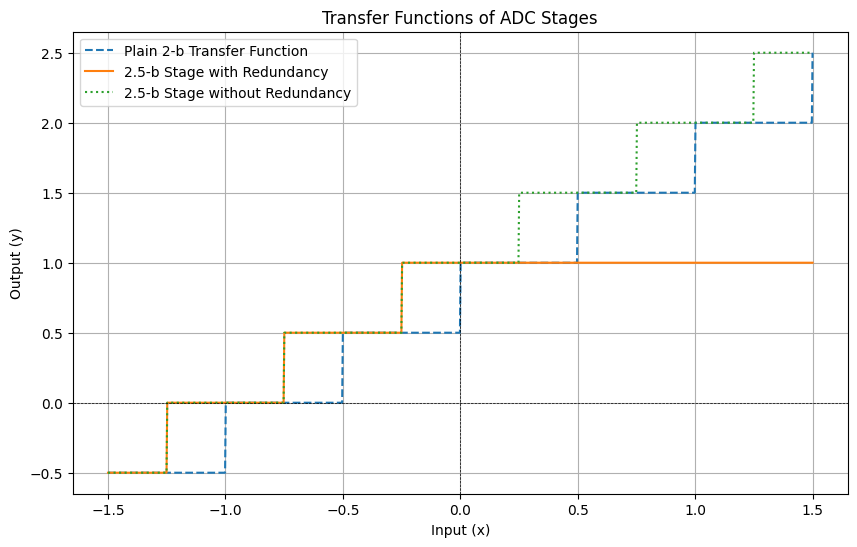

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the transfer functions
x = np.linspace(-1.5, 1.5, 1000)

# Plain 2-b transfer function
y_2b = np.floor(2 * x + 2) / 2

# 2.5-b stage with redundancy
y_25b_redundant = np.clip(np.floor(2 * x + 2.5) / 2, -1, 1)

# 2.5-b stage without redundancy
y_25b_no_redundant = np.floor(2 * x + 2.5) / 2

# Plot the transfer functions
plt.figure(figsize=(10, 6))
plt.plot(x, y_2b, label="Plain 2-b Transfer Function", linestyle='--')
plt.plot(x, y_25b_redundant, label="2.5-b Stage with Redundancy")
plt.plot(x, y_25b_no_redundant, label="2.5-b Stage without Redundancy", linestyle=':')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.title("Transfer Functions of ADC Stages")
plt.xlabel("Input (x)")
plt.ylabel("Output (y)")
plt.legend()
plt.grid()
plt.show()

2. Use a tone test input signal and introduce a V_R/8 offset in the comparators. Plot Vo and the SNR in each case. 

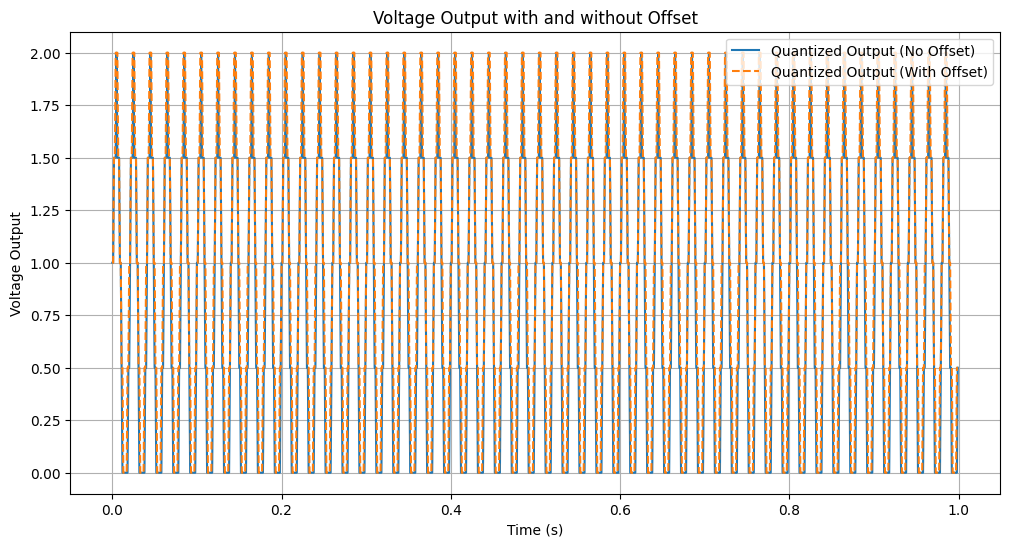

SNR without offset: -0.98 dB
SNR with offset: -0.79 dB


In [6]:
# Define the tone test input signal
fs = 1000  # Sampling frequency
f = 50     # Frequency of the tone
t = np.linspace(0, 1, fs, endpoint=False)  # Time vector
tone_input = np.sin(2 * np.pi * f * t)

# Introduce a voltage reference offset (V_R/8)
V_R = 1  # Voltage reference
offset = V_R / 8
tone_input_offset = tone_input + offset

# Quantize the tone input signals
quantized_output = np.floor(2 * tone_input + 2) / 2
quantized_output_offset = np.floor(2 * tone_input_offset + 2) / 2

# Calculate SNR
def calculate_snr(signal, quantized_signal):
    noise = signal - quantized_signal
    signal_power = np.mean(signal ** 2)
    noise_power = np.mean(noise ** 2)
    snr = 10 * np.log10(signal_power / noise_power)
    return snr

snr_original = calculate_snr(tone_input, quantized_output)
snr_offset = calculate_snr(tone_input_offset, quantized_output_offset)

# Plot the voltage output
plt.figure(figsize=(12, 6))
plt.plot(t, quantized_output, label="Quantized Output (No Offset)")
plt.plot(t, quantized_output_offset, label="Quantized Output (With Offset)", linestyle='--')
plt.title("Voltage Output with and without Offset")
plt.xlabel("Time (s)")
plt.ylabel("Voltage Output")
plt.legend()
plt.grid()
plt.show()

# Print SNR values
print(f"SNR without offset: {snr_original:.2f} dB")
print(f"SNR with offset: {snr_offset:.2f} dB")